<center><h1><b>Lecture 4</b></h1></center>
<center><h1><b>Monte Carlo Method, Sampling, and Confidence Intervals</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and R78 (15:30 ~ 17:20)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2024 Spring</h5></center>


## Last Time

- Part I: Random Walk
    * Random walks
    * The drunkard's walk
    * Biased random walks
    * Treacherous fields
- Part II: Stochastic Programs
    * Stochastic programs
    * Inferential statistics
    * Distributions
    * Simulation of more practical cases

## **Today**

<ul>
  <li><a href="#tag1">Law of large numbers</a></li>
  <li><a href="#tag2">Monte Carlo method</a></li>
  <li><a href="#tag3">Sampling</a></li>
  <li><a href="#tag4">The central limit theorem (CLT) and confidence interval</a></li>
</ul>


## **Introduction**

#### Recall the Simulation of Flipping Coin

<center>
<img align="center" height=300px width=auto src="./assets/fig1.png">
<br >
<img align="center" height=300px width=auto src="./assets/fig2.png">
</center>

- What have we learned in this simulation?

    * As the number of flips increases, __the mean of heads/tails ratio tempts to converge__ and the standard deviation decreases.

    * We already know the truth that the probability of getting a head/tail from a fair coin is exactly 0.5.
    
    * After this simulation, we can confirm that this is truth.

- - -

#### Pascal's Problem

- Reputedly, Pascal’s interest in the field that came to know as probability theory began when a friend asked him a question:

    >
    >   Is it profitable to bet that one can get a double 6 within 24 rolls of a pair of dice?
    >

- To solve this problem, we have

    1. The probability of rolling a double 6 is $\frac{1}{36}$.

    2. The probability of not rolling a double 6 on the first roll is $1 - \frac{1}{36} = \frac{35}{36}$.

    3. Therefore the probability of not rolling a double 6 in 24 consecutive times is $(\frac{35}{36})^{24} \approx 0.49$

- Also, we can write a stochastic program to simulate this game.

Run Simulation of Pascal's Game
    Probability of winning = 0.4913


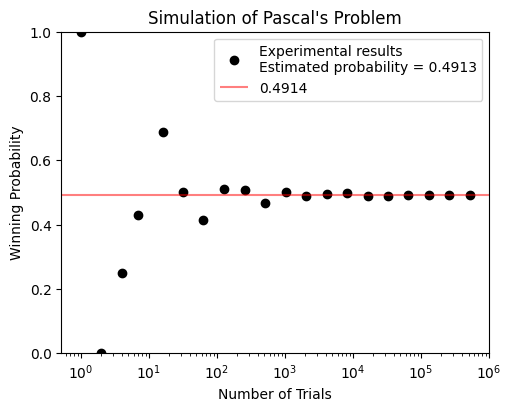

In [1]:
from scripts.testFuncs import test1

test1()

#### What have we learned in the Pascal's problem?

1. As the number of trials increases, __the winning probability tempts to converge__.

2. According to our derivation, the probability of not rolling a double $6$ in $24$ consecutive times is $(\frac{35}{36})^{24} \approx 0.4914$.
    
- After this simulation, we can confirm that this is truth.

- - -

#### $\pi$ Estimation

- One of the most historical achievement in mathematics is the estimation of the mathematical constant, $\pi$. The approximation reached an accuracy within $0.04%$ of the true value before the beginning of the Common Era. Nowadays, the current record of approximation error is within 100 trillion ($10^{14}$) digits.

- Long before computers were invented, the French mathematicians [Buffon (1707-1788)](https://en.wikipedia.org/wiki/Georges-Louis_Leclerc,_Comte_de_Buffon) and [Laplace (1749-1827)](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) proposed using a stochastic simulation to estimate the value of $\pi$.

- Today, we are going to use the computer to solve this issue.

<center>
<img align="center" height=300px width=auto src="./assets/fig3.png">
</center>

- To solve this, let's assume $P_0 (x,y)$ is a point sampled from $R = [-1,1] \times [-1,1]$. What we are interesting is the probability that $P_0$ is in the circle?

    1. The area of the square is $A_1 = 4$.

    2. The area of the circle is $A_2 = \pi \cdot 1^2 = \pi$.

    3. The probability that $P_0$ is in the circle is $\frac{A_2}{A_1} = \frac{\pi}{4}$.

    4. Let’s assume we have $N$ points which are uniformly sampled from $R = [-1,1] \times [-1,1]$. And we found that $m$ points are in the circle. We can estimate the value of $\pi$ based on $\pi \approx \frac{4m}{N}$.

- Also, we can write a stochastic program to simulate this estimation.

Est. = 3.120000, STD = 1.656985, numData = 1
Est. = 3.200000, STD = 1.095445, numData = 2
Est. = 3.170000, STD = 0.825288, numData = 4
Est. = 3.234286, STD = 0.652630, numData = 7
Est. = 3.047500, STD = 0.489509, numData = 16
Est. = 3.125000, STD = 0.316721, numData = 32
Est. = 3.151111, STD = 0.195418, numData = 63
Est. = 3.139843, STD = 0.133530, numData = 127
Est. = 3.140781, STD = 0.095184, numData = 256
Est. = 3.150547, STD = 0.073718, numData = 512
Est. = 3.153203, STD = 0.050915, numData = 1024
Est. = 3.136230, STD = 0.036804, numData = 2048
Est. = 3.142447, STD = 0.025747, numData = 4095
Est. = 3.141707, STD = 0.017841, numData = 8191
Est. = 3.141193, STD = 0.012693, numData = 16383
Est. = 3.142621, STD = 0.009886, numData = 32768


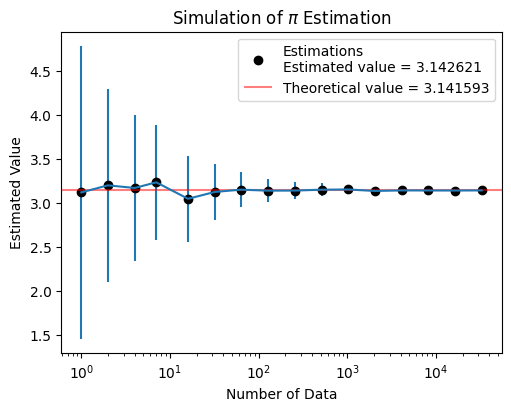

In [1]:
from scripts.testFuncs import test2

test2(numTrials=100, toPrint=True)




#### What have we learned in the $\pi$ Estimation?

1. As the number of data increases, **the estimated value tempts to converge** and **the standard deviation of estimations is decreasing**.

2. According to our simulation, we can only get a **“close”** result of $\pi$, which means that we will never acquire an correct answer.
    


<a id="tag1"></a>

## **Law of Large Numbers**

#### The Expectation of Sample Means (The Means of the Samples)

- Why can we acquire an estimation that is more and more accurate as the number of data increasing?

- For **independent and identically distributed (i. i. d.)** random variables $X_1, X_2, \dots, X_n$, the **sample mean** $\bar{X}$ is defined as

$$
\bar{X} = \frac{X_1 + X_2 + \dots + X_n}{n}
$$

- Since the $X_i$'s are random variables, the sample mean $\bar{X}$ is also a random variable. Thus we have

$$
\begin{aligned}

\mathbb{E} [\bar{X}] &= \frac{\mathbb{E} [X_1] + \mathbb{E} [X_2] + \dots + \mathbb{E} [X_n]}{n} \\
&= \frac{n \cdot \mathbb{E} [X]}{n} = \mathbb{E} [X]

\end{aligned}
$$

- The above equation means that, as the number of sample increasing, **the expectation of sample means** is equal to **the expectation of the population mean**.

- - -

#### The Variance of the Sample Means

- Also, the variance of the sample mean $\bar{X}$ is given by

$$
\begin{aligned}

\text{Var} [\bar{X}] &= \frac{ \text{Var} [X_1 + X_2 + \dots + X_n] }{n^2} \\
&= \frac{ \text{Var}[X_1] + \text{Var}[X_2] + \dots + \text{Var}[X_n] }{n^2} \\
&= \frac{ n \cdot \text{Var}[X] }{n^2} = \frac{\text{Var}[X]}{n}

\end{aligned}
$$

- This means that, as the number of sample increasing, **the variance of the sample means** is equal to **the variance of the population divided by the sample size, n**.

- Therefore, we get the **weak law of large numbers (WLLN)**. For any $\epsilon > 0$,

$$
\lim_{n \to \infty} P(|\bar{X} - \mu| \geq \epsilon) = 0
$$


<a id="tag2"></a>

## **Monte Carlo method**

- A numerical approach for acquiring **an approximate solution** of a problem that is **difficult to solve its analytical solution**.

- It is an approximate solution based on the law of large numbers. This implies that it can only provide a close enough solution, not correct answer.

- General flowchart:

    1. Define a domain of possible inputs.
    
    2. Generate inputs randomly from a probability distribution over the domain.
    
    3. Perform a deterministic computation on the inputs.
    
    4. Aggregate the results.

- - -

#### 1. Area Estimation

<center>
<img align="center" height=300px width=auto src="./assets/fig4.png">
</center>

- Calculate the area of gray region.

    1. Domain of possible inputs: $ x, y \isin [0, 1]$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Count 1 if the sample satisfies the conditions ($ M = M +1 $)

    $$
    x^2 + y^2 \leq 1 \\
    (x-1)^2 + (y-1)^2 \leq 1
    $$

    4. Aggregate the result by 
    
    $$
    \text{Estimation} = \frac{M}{N}
    $$

In [ ]:
from scripts.testFuncs import test3

test3(numTrials=100, toPrint=True)

- - -

#### 2. Monte Carlo Integration (univariate)

<center>
<img align="center" height=300px width=auto src="./assets/fig5.png">
</center>

- Given an univariate function $f(x)$, calculate a definite integral $I$ from $a$ to $b$.

    $$
    I = \int_{a}^{b} {f(x)} \,{\rm d}x \\
    f(x) = \frac{x}{2}
    $$

    1. Domain of possible inputs: $ x \isin [1.2, 3.5]$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{(b-a)}{N} \sum_{n=1}^{N} f(x_i)
    $$

    

In [ ]:
from scripts.testFuncs import test4

test4(numTrials=100)

- - -

#### Exercise I: Monte Carlo Integration

<center>
<img align="center" height=300px width=auto src="./assets/fig6.png">
</center>

- Please estimate the area of function $f(x)$ from 0.5 to 3.0 based on Monte Carlo method.

$$
I = \int_{0.5}^{3.0} {f(x)} \,{\rm d}x \\
f(x) = \frac{1}{1 + \sin{x} \cdot (\ln{x})^2}
$$

- Please repeat your estimation 100 times. The standard deviation of your estimation in these 100 trials should be less than 0.01.


In [ ]:
from scripts.exercise_solution import exercise1
import numpy as np

func = lambda x: (1 + np.sin(x) * (np.log(x))**2)**(-1)
a, b = 0.5, 3
exercise1(numTrials=100, a=a, b=b, func=func)

- - -

#### 3. Monte Carlo Integration (multi-variate)

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    $$

    1. Domain of possible inputs: $ \bold{x} \isin \Omega$

    2. Randomly and uniformly generate $N$ samples over the domain.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N} \sum_{n=1}^{N} f(\mathbf{x}_i)
    $$

- However, the shape of domain $\Omega$ will affect the result of your estimation.

- - -

##### 3.1 Multi-variate Monte Carlo Integration on Rectangular Domain

<center>
<img align="center" height=300px width=auto src="./assets/fig7.png">
<img align="center" height=300px width=auto src="./assets/fig8.png">
</center>

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega = [-1,1] \times [-1,1]$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    f(x, y) = \frac{1}{2 \pi} \exp{ [- \frac{1}{2} (x^2 + y^2)] }
    $$

    1. Domain of possible inputs: $ \bold{x} \isin \Omega = [-1,1] \times [-1,1]$

    2. Randomly and uniformly generate $N$ samples over the domain $\Omega = [-1,1] \times [-1,1]$.

    3. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N_{\Omega}} \sum_{n=1}^{N_{\Omega}} f(\mathbf{x}_i)
    $$

- - -

##### 3.2 Multi-variate Monte Carlo Integration on Non-rectangular Domain

<center>
<img align="center" height=300px width=auto src="./assets/fig9.png">
<img align="center" height=300px width=auto src="./assets/fig10.png">
</center>

- Given a multi-variate function $f(\mathbf{x})$, calculate a definite integral $I$ in domain $\Omega : x^2 + y^2 \leq 1$.

    $$
    I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x {\rm d}y \\
    f(x, y) = \frac{1}{2 \pi} \exp{ [- \frac{1}{2} (x^2 + y^2)] }
    $$

    1. Domain of possible inputs: $ \bold{x} \isin \Omega = [-1,1] \times [-1,1]$

    2. Randomly and uniformly generate $N_R$ samples over the domain $R = [-1,1] \times [-1,1]$.

    3. Keep the samples in the domain $\Omega$. The number of samples in the domain is approximately $N_{\Omega}$.

    4. Calculate $E_N$ as an approximation of $I$

    $$
    E_N = \frac{\text{Area}(\Omega)}{N} \sum_{n=1}^{N} f(\mathbf{x}_i)
        = \frac{\text{Area}(R)}{N_{R}} \sum_{n=1}^{N_{\Omega}} f(\mathbf{x}_i) \\
    
    \because \frac{N_{\Omega}}{N_R} = \frac{\text{Area}(\Omega)}{\text{Area}(R)}
    $$


In [ ]:
from scripts.testFuncs import test5

L = 2
test5(numTrials=64, a=(-L, -L), b=(L, L))

- - -

#### Exercise II: Multi-variate Monte Carlo Integration

<center>
<img align="center" height=300px width=auto src="./assets/fig11.png">
</center>

- Please estimtate the definite integral of function $f(x, y)$ over domain $\Omega$ based on Monte Carlo method.

$$
\begin{aligned}

& I = \iint_{\Omega}^{} {f(x, y)} \,{\rm d}x{\rm d}y \\
& f(x, y) = \exp{(- \frac{x'^2 + \gamma^2 y'^{2}}{2 \sigma^2} )} \cdot \exp{[ -j (\frac{2 \pi}{\lambda} x' + \phi)]} \\

& \begin{bmatrix} x' \\ y' \end{bmatrix} = 
\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} \\

\end{aligned}
$$

- The condition of this exercise:

$$
\begin{aligned}

& \Omega : \frac{|x - 0.3|}{2} + |y - 0.3| \leq 0.25 \\

& (\sigma, \gamma, \theta, \lambda, \phi) = (0.4, 2, \frac{\pi}{4}, 1, 0)

\end{aligned}
$$

- Please repeat your estimation 100 times. The standard deviation of your estimation in these 100 trials should be less than 0.01.


In [ ]:
from scripts.exercise_solution import exercise2

a, b = (-1, -1), (1, 1)

exercise2(numTrials=100, a=a, b=b)

#### Brief Summary of Monte Carlo Method

- A numerical approach for acquiring **an approximate solution** of a problem that is **difficult to solve its analytical solution**.

- It is an approximate solution based on **the law of large numbers**. This implies that it **can only provide a close enough solution, not correct answer**.

- General flowchart:

    1. Define a domain $\Omega$ of possible inputs, $\bold{x} \isin \Omega$.
    
    2. Randomly generate $N_R$ samples from a probability distribution (usually use uniform distribution) over the domain $R$. The target domain $\Omega$ should be in the domain $R$ ($\Omega \isin R$). 

    3. Keep the samples in the domain $\Omega$. The number of samples in the domain is approximately $N_{\Omega}$.
    
    4. Perform a deterministic computation on the inputs.
    
    5. Aggregate the results.

<a id="tag3"></a>

## **Sampling**

- By analyzing the data of MLB 2023 Season, we can get a distribution of batting averages of the batter who had played at least 100 plate appearance.

- Also, we can calculate the mean of batting averages and its standard deviation.

<center>
<img align="center" height=300px width=auto src="./assets/fig12.png">
</center>

- The distribution of batting averages resembles a normal distribution, but is clearly not normal because of the tail on the left side.

#### Sampling with Small Sample Size

- Let’s pretend that we don’t have access to the data about all batters, and instead want to estimate some statistics about the batting averages of the entire league by sampling a small number of randomly chosen batters.

<center>
<img align="center" height=300px width=auto src="./assets/fig13.png">
</center>

- The distribution of the sample does not resemble to a normal distribution, much father from normal than the distribution from which it was drawn.

- However, the difference between the estimated mean and the population mean is only about 2.9% even though it is a result of small sample size (30 out of 462).

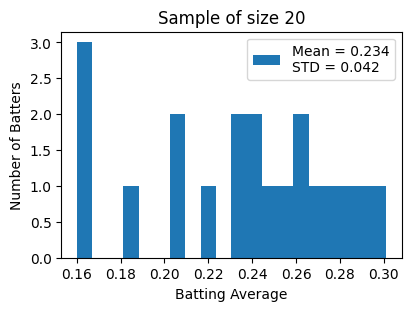

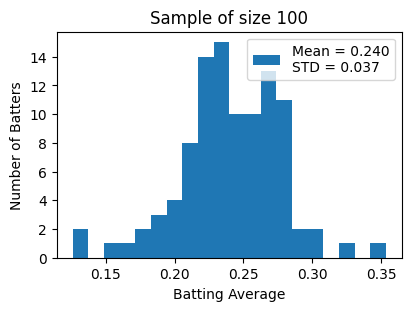

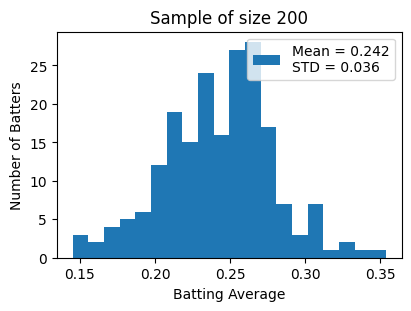

In [1]:
from scripts.testFuncs import test6

test6()

#### What We Have Learned from LLN

- The Law of Large Numbers (LLN) shows that, as the number of sample size increasing,

$$
\begin{aligned}

\mathbb{E} [\bar{X}] &= \mathbb{E} [X] \\
\text{Var} [\bar{X}] &= \frac{\text{Var} [X]}{n}

\end{aligned}
$$

- Large is good, but how many sample is large enough?

- It depends upon the variance of the population.

#### Effect of Variance on Mean Estimation

- Consider two uniform distributions, one with a mean of 0 and standard deviation of 1.73, and the other with a mean of 0 and standard deviation of 57.74. If we were to select one randomly chosen element from one of these distributions and use it to estimate the mean of the distribution, the probability of that estimate being within any desired accuracy, $\epsilon$, of the true mean, would be equal to the area under the PDF between $[−\epsilon, \epsilon]$.

- However, the sample means form a distribution that is close to a normal distribution centered around 0, the true mean.


Probability of being within [-3, 3] of tight distribution = 0.30
Probability of being within [-3, 3] of wide distribution = 0.03


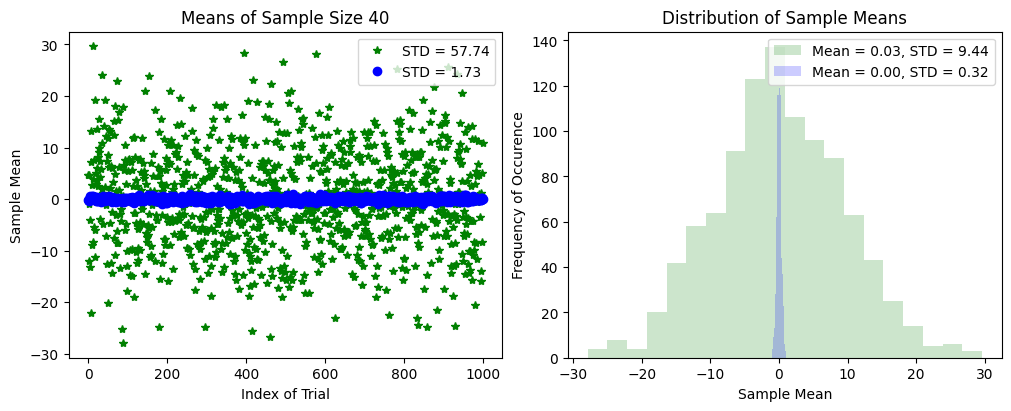

In [1]:
from scripts.basicFuncs import uniform
from scipy.integrate import quad
from scripts.testFuncs import test7

area1 = quad(uniform, -3, 3, (-10, 10))[0]
area2 = quad(uniform, -3, 3, (-100, 100))[0]

print("Probability of being within [-3, 3] of tight distribution = {:.02f}".format(area1))
print("Probability of being within [-3, 3] of wide distribution = {:.02f}".format(area2))

test7(numSamples=40, numTrials=1000)

In [4]:
print(9.44 * 40**0.5)
print(0.32 * 40**0.5)

59.703802223979004
2.023857702507763


<a id="tag4"></a>

## **The Central Limit Theorem (CLT) and Confidence Interval**

#### The Central Limit Theorem (CLT)

- Given a set of sufficiently large samples drawn from the same population, **the sample means will be approximately normally distributed**, i.e., the distribution of sample means will be a normal distribution.

- This normal distribution will **have a mean close to the mean of the population**.

- The variance of the sample means will be **close to the variance of the population divided by the sample size**.


In [1]:
from scripts.testFuncs import test8

test8()

Result of simulation, number of samples = 10:
------------------------------------------------------------
Mean of tight distribution (s, p) = (0.02, 0.00)
Variance of tight distribution (s, p) = (0.40, 3.00)
Mean of wide distribution (s, p) = (0.82, 0.00)
Variance of wide distribution (s, p) = (342.97, 3333.33)
Result of simulation, number of samples = 50:
------------------------------------------------------------
Mean of tight distribution (s, p) = (-0.01, 0.00)
Variance of tight distribution (s, p) = (0.08, 3.00)
Mean of wide distribution (s, p) = (0.04, 0.00)
Variance of wide distribution (s, p) = (65.24, 3333.33)
Result of simulation, number of samples = 100:
------------------------------------------------------------
Mean of tight distribution (s, p) = (0.00, 0.00)
Variance of tight distribution (s, p) = (0.04, 3.00)
Mean of wide distribution (s, p) = (-0.25, 0.00)
Variance of wide distribution (s, p) = (31.58, 3333.33)


#### Confidence Interval

- A confidence interval provides a range that is likely to contain the unknown value and a degree of confidence that the unknown value lies within the range.

<img align="center" height=300px width=auto src="./assets/fig14.png">

- For example, a political poll might indicate that a candidate is likely to get $87 \%$ of the vote $\pm 3 \%$ with a **confidence level** of $95 \%$.

    * The size of confidence interval is $6 \%$.

    * The pollster believes that $\color{#FFF200} 95 \%$ of the time the candidate will receive between $\color{#FFF200} 84 \%$ and $\color{#FFF200} 90 \%$ of the vote.

- Since the Central Limit Theorem tells us that the sample means will be normally distributed, we can use the standard deviation and the empirical rule to compute a $95 \% (\pm 1.96 \cdot \text{STD})$ confidence interval for each sample size.


In [1]:
from scripts.testFuncs import test9

test9()

Result of simulation, number of samples = 10:
------------------------------------------------------------
Mean of tight distribution (s, p) = (0.02, 0.00)
STD of tight distribution (s, p) = (0.66, 1.73)
    The mean of population is 0.02±1.30 with 95% confidence.
Mean of wide distribution (s, p) = (-0.68, 0.00)
STD of wide distribution (s, p) = (18.40, 57.74)
    The mean of population is -0.68±36.06 with 95% confidence.
Result of simulation, number of samples = 50:
------------------------------------------------------------
Mean of tight distribution (s, p) = (-0.01, 0.00)
STD of tight distribution (s, p) = (0.29, 1.73)
    The mean of population is -0.01±0.56 with 95% confidence.
Mean of wide distribution (s, p) = (0.20, 0.00)
STD of wide distribution (s, p) = (8.60, 57.74)
    The mean of population is 0.20±16.85 with 95% confidence.
Result of simulation, number of samples = 100:
------------------------------------------------------------
Mean of tight distribution (s, p) = (-0.0

## Reference

The data of this lecture is from [Baseball Reference](https://www.baseball-reference.com/) and [FanGraphs BaseBall](https://www.fangraphs.com/).
